In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data = pd.read_csv('spotify detailed.csv')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32831 entries, 0 to 32830
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32831 non-null  object 
 1   track_name                32826 non-null  object 
 2   track_artist              32826 non-null  object 
 3   track_popularity          32831 non-null  int64  
 4   track_album_id            32831 non-null  object 
 5   track_album_name          32826 non-null  object 
 6   track_album_release_date  32831 non-null  object 
 7   playlist_name             32831 non-null  object 
 8   playlist_id               32831 non-null  object 
 9   playlist_genre            32831 non-null  object 
 10  playlist_subgenre         32831 non-null  object 
 11  danceability              32831 non-null  float64
 12  energy                    32831 non-null  float64
 13  key                       32831 non-null  int64  
 14  loudne

In [22]:
print(data.head())
data.dropna(inplace=True) 
#Dropping NaN values in the dataset

                 track_id                                         track_name  \
0  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
1  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
2  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
3  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   
4  7fvUMiyapMsRRxr07cU8Ef  Beautiful People (feat. Khalid) - Jack Wins Remix   

       track_artist  track_popularity          track_album_id  \
0          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
1      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
2  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
3     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   
4        Ed Sheeran                67  2yiy9cd2QktrNvWC2EUi0k   

                                    track_album_name track_album_release_date  \
0                    Memories (Dillon Francis R

Explorary Data Analysis
EDA, or Exploratory Data Analysis, is a critical approach used to understand data, detect patterns, uncover anomalies, and form hypotheses in a preliminary stage of data analysis.

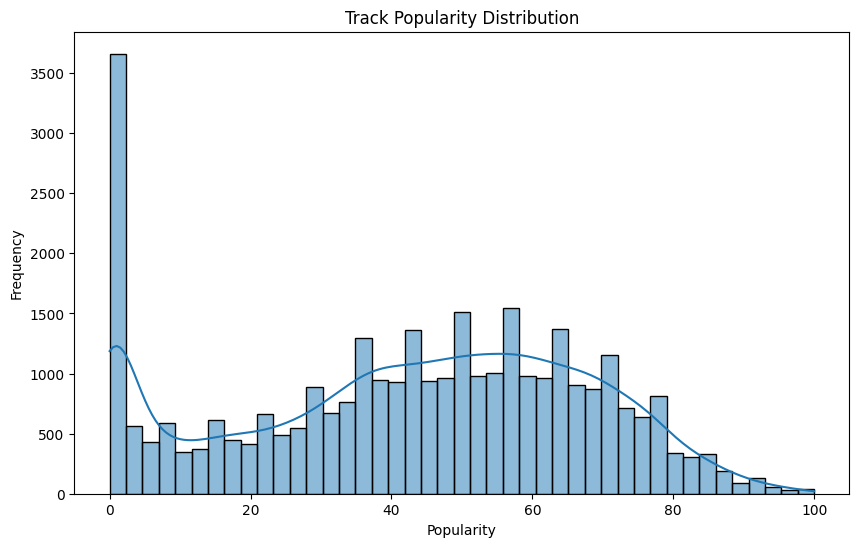

In [23]:
#Plotting Histplot
plt.figure(figsize=(10, 6))
sns.histplot(data['track_popularity'], kde=True)
plt.title('Track Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

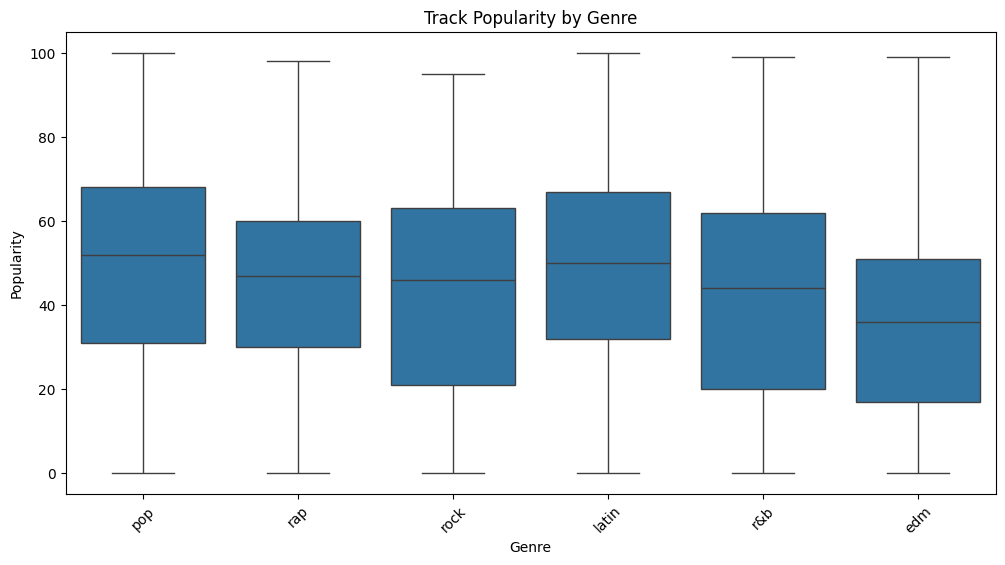

In [24]:
#Plotting Boxplot for tracking popularity by genre
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='playlist_genre', y='track_popularity')
plt.xticks(rotation=45)
plt.title('Track Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.show()


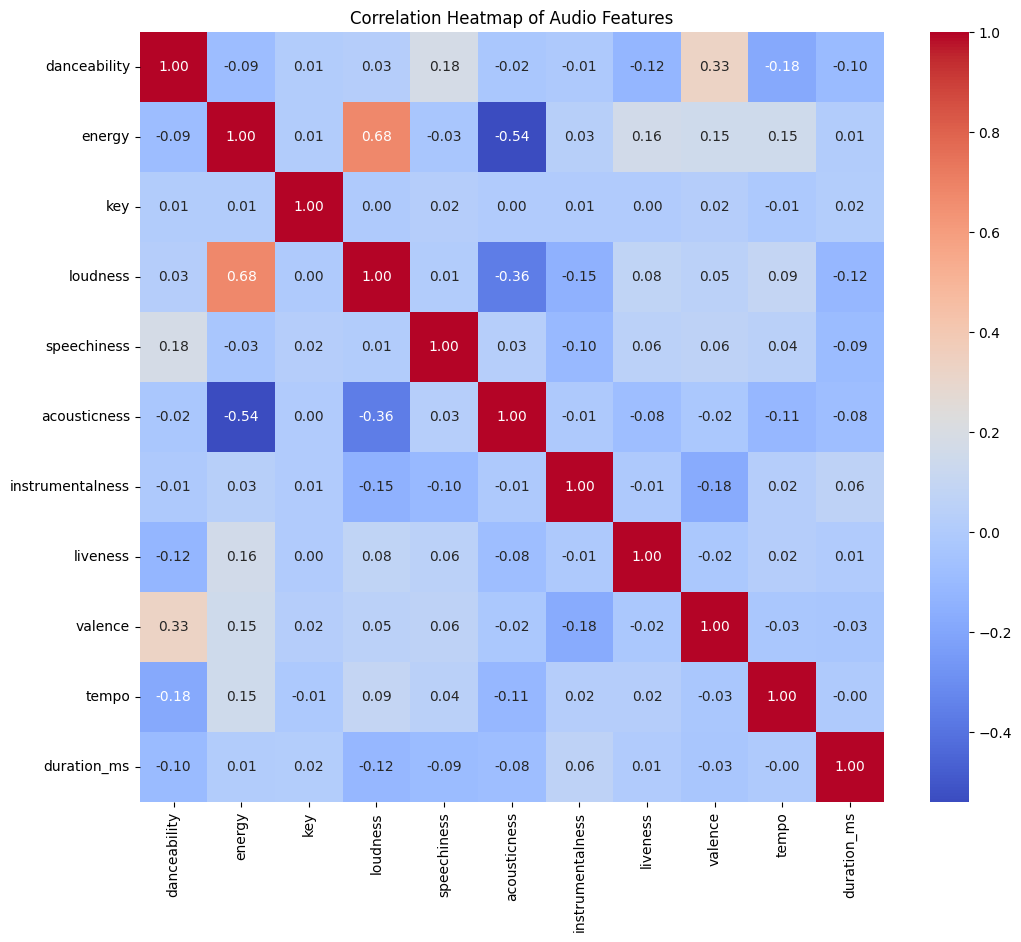

In [25]:
#Plotting Heatmap for different features
audio_features = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 
                  'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
plt.figure(figsize=(12, 10))
sns.heatmap(data[audio_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Audio Features')
plt.show()


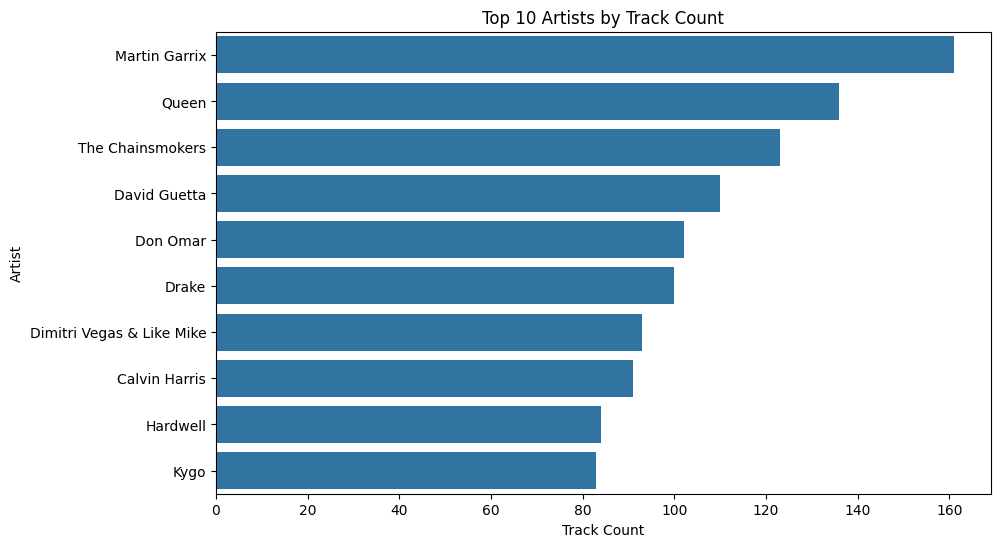

In [26]:
#Plotting graph for top 10 artists by the number of tracks in database
top_artists = data['track_artist'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_artists.index, x=top_artists.values)
plt.title('Top 10 Artists by Track Count')
plt.xlabel('Track Count')
plt.ylabel('Artist')
plt.show()


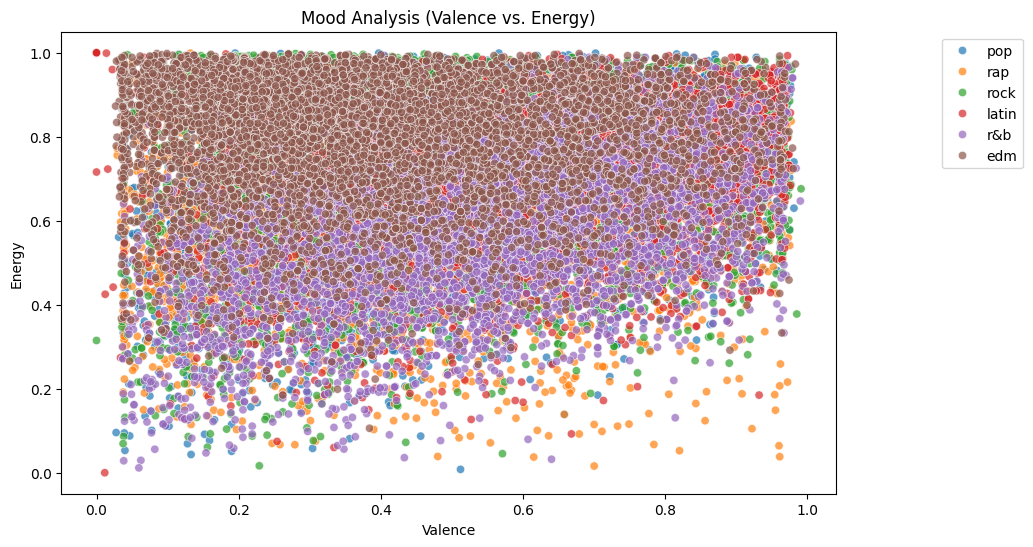

In [27]:
#Plotting a scatterplot grpah for mood analysis between genres
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='valence', y='energy', hue='playlist_genre', alpha=0.7)
plt.title('Mood Analysis (Valence vs. Energy)')
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


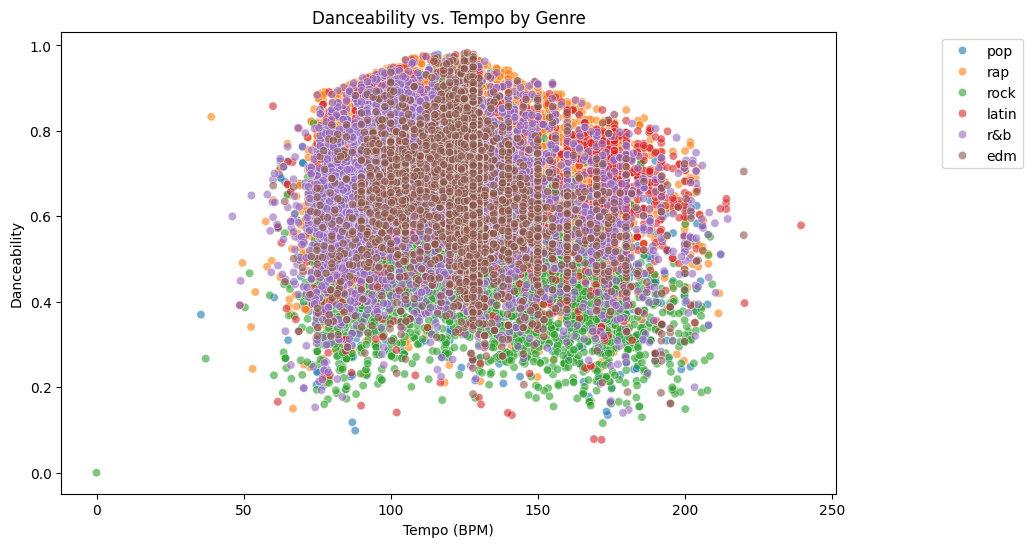

In [28]:
#Plotting a heat graph to analyze danceabiity of a song with it's tempo
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='tempo', y='danceability', hue='playlist_genre', alpha=0.6)
plt.title('Danceability vs. Tempo by Genre')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Danceability')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

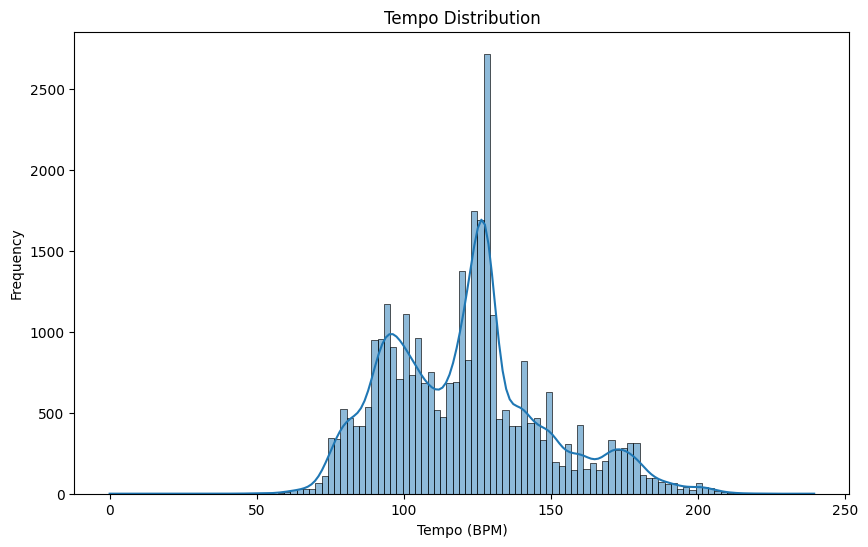

In [29]:
#Plotting Tempo Distribution graph 
plt.figure(figsize=(10, 6))
sns.histplot(data['tempo'], kde=True)
plt.title('Tempo Distribution')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Frequency')
plt.show()


In [30]:

label_encoder = LabelEncoder()
data['playlist_genre'] = label_encoder.fit_transform(data['playlist_genre'])
data['track_artist'] = label_encoder.fit_transform(data['track_artist'])
data['track_album_name'] = label_encoder.fit_transform(data['track_album_name'])

In [31]:
features = data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
                 'duration_ms']]
target = data['playlist_genre']

In [32]:
#Standardizing the dataset
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

Using Nearest Neighbour(Unsupervised algo) for training the ML model

In [33]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)


In [34]:
knn = NearestNeighbors(n_neighbors=5) 
knn.fit(X_train)

NearestNeighbors()

In [35]:
def recommend_songs(song_name, num_recommendations=5):
    if song_name not in data['track_name'].values:
        return f"Song '{song_name}' not found in the dataset."
    
    song_data = data[data['track_name'] == song_name].iloc[0]
    
    user_input = song_data[['danceability', 'energy', 'key', 'loudness', 'mode', 
                             'speechiness', 'acousticness', 'instrumentalness', 
                             'liveness', 'valence', 'tempo', 'duration_ms']].values.reshape(1, -1)
    
    user_input_scaled = scaler.transform(user_input)
    distances, indices = knn.kneighbors(user_input_scaled, n_neighbors=num_recommendations)
    
    recommended_songs = data.iloc[indices[0]]
    return recommended_songs[['track_name', 'track_artist', 'track_album_name', 'playlist_genre']]

user_input_song = 'Call You Mine - Keanu Silva Remix' 
recommended = recommend_songs(user_input_song)
print("Recommended Songs:")
print(recommended)

Recommended Songs:
                                           track_name  track_artist  \
14960                 Wild Frontier - Remastered 2002          3460   
26071                                 This Ain't Love          4658   
50     Crash Into Me - Settle Down Steavis Aoki Remix          8793   
2990                      Take Ü There (feat. Kiesza)          4247   
3347                                Por Estar Contigo          4206   

       track_album_name  playlist_genre  
14960             16675               5  
26071             18368               3  
50                 3641               2  
2990              14623               2  
3347              12755               2  


c:\Users\r-mit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Alternatively we can use this
```py
def recommend_songs(song_name, num_recommendations=5):
    song_name_normalized = song_name.lower().strip()

    matching_songs = data[data['track_name'].str.lower().str.contains(song_name_normalized, na=False)]

    if matching_songs.empty:
        return f"Song '{song_name}' not found in the dataset."

    song_data = matching_songs.iloc[0]
    
    user_input = song_data[['danceability', 'energy', 'key', 'loudness', 'mode', 
                             'speechiness', 'acousticness', 'instrumentalness', 
                             'liveness', 'valence', 'tempo', 'duration_ms']].values.reshape(1, -1)
    
    user_input_scaled = scaler.transform(user_input)
    distances, indices = knn.kneighbors(user_input_scaled, n_neighbors=num_recommendations)
    
    recommended_songs = data.iloc[indices[0]]
    return recommended_songs[['track_name', 'track_artist', 'track_album_name', 'playlist_genre']]

user_input_song = 'Heaven Can Wait' 
recommended = recommend_songs(user_input_song)
print("Recommended Songs:")
print(recommended)```

In [36]:
# Accuracy of model

distances, indices = knn.kneighbors(X_test)

average_distance = np.mean(distances)

print(f"Average distance to the 5 nearest neighbors in X_test: {average_distance:.4f}")


Average distance to the 5 nearest neighbors in X_test: 1.2087
